                                                                        Dia 1 - Importação de dados

In [32]:
import pandas as pd #import pandas library for data manipulation
import numpy as np #import numpy library for numerical operations
import matplotlib.pyplot as plt

In [33]:

# Lista dos arquivos
arquivos = [
    "emprestimos-20101.csv",
    "emprestimos-20102.csv",
    "emprestimos-20111.csv",
    "emprestimos-20112.csv",
    "emprestimos-20121.csv",
    "emprestimos-20122.csv",
    "emprestimos-20131.csv",
    "emprestimos-20132.csv",
    "emprestimos-20141.csv",
    "emprestimos-20142.csv",
    "emprestimos-20151.csv",
    "emprestimos-20152.csv",
    "emprestimos-20161.csv",
    "emprestimos-20162.csv",
    "emprestimos-20171.csv",
    "emprestimos-20172.csv",
    "emprestimos-20181.csv",
    "emprestimos-20182.csv",
    "emprestimos-20191.csv",
    "emprestimos-20192.csv",
    "emprestimos-20201.csv"
]

base_url = "https://raw.githubusercontent.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/main/Dia_1-Importando_dados/Datasets/dados_emprestimos/"

# Lista para guardar os DataFrames
dfs = []

for arquivo in arquivos:
    url = base_url + arquivo
    df_temp = pd.read_csv(url, encoding='utf-8')  # ou encoding='utf-8' se preferir
    dfs.append(df_temp)

# Concatenar todos os dataframes em um só
df_completo = pd.concat(dfs, ignore_index=True)

# Mostrar as primeiras linhas para verificar
df_completo.head()




,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario
0,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2.008023e+09,ALUNO DE GRADUAÇÃO
1,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2.008023e+09,ALUNO DE GRADUAÇÃO
2,709686,2006017618,2010/01/26 08:07:01.738000000,2010/01/04 08:08:44.081000000,2010/02/25 07:36:25.800000000,2.008112e+09,ALUNO DE PÓS-GRADUAÇÃO
3,709687,L184117,2010/01/18 11:07:46.470000000,2010/01/04 08:24:21.284000000,2010/02/03 08:58:45.692000000,2.007211e+08,ALUNO DE GRADUAÇÃO
4,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2.008023e+09,ALUNO DE GRADUAÇÃO


In [34]:

df_completo.info(), # Exibe informações sobre o DataFrame, como número de entradas, colunas e tipos de dados
df_completo.describe() # Exibe estatísticas descritivas para colunas numéricas do DataFrame


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2258018 entries, 0 to 2258017
Data columns (total 7 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id_emprestimo         int64  
 1   codigo_barras         object 
 2   data_renovacao        object 
 3   data_emprestimo       object 
 4   data_devolucao        object 
 5   matricula_ou_siape    float64
 6   tipo_vinculo_usuario  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 120.6+ MB


,id_emprestimo,matricula_ou_siape
count,2.258018e+06,2.254848e+06
mean,2.617069e+06,6.127611e+09
std,2.517077e+06,7.827175e+09
min,7.096840e+05,0.000000e+00
25%,1.288985e+06,2.010057e+09
50%,1.854210e+06,2.012975e+09
75%,2.653337e+06,2.016069e+09
max,1.032233e+07,2.022301e+10


In [35]:
df_completo.shape # Exibe a forma do DataFrame, ou seja, o número de linhas e colunas

(2258018, 7)

In [36]:
linhas, colunas = df_completo.shape # Exibe o número de linhas e colunas do DataFrame
print('Linhas:', linhas)
print('Colunas:', colunas)


Linhas: 2258018
Colunas: 7


In [37]:
df_completo.columns # Exibe os nomes das colunas do DataFrame

Index(['id_emprestimo', 'codigo_barras', 'data_renovacao', 'data_emprestimo',
       'data_devolucao', 'matricula_ou_siape', 'tipo_vinculo_usuario'],
      dtype='object')

In [38]:
# Verificando valores nulos
print("Nulos por coluna:")
print(df_completo.isnull().sum())

print("\nTotal geral de valores nulos:", df_completo.isnull().sum().sum())

print("\nPercentual de nulos por coluna:")
print((df_completo.isnull().mean() * 100).round(2))



Nulos por coluna:
id_emprestimo                 0
codigo_barras                 0
data_renovacao          1285720
data_emprestimo               0
data_devolucao             6471
matricula_ou_siape         3170
tipo_vinculo_usuario          0
dtype: int64

Total geral de valores nulos: 1295361

Percentual de nulos por coluna:
id_emprestimo            0.00
codigo_barras            0.00
data_renovacao          56.94
data_emprestimo          0.00
data_devolucao           0.29
matricula_ou_siape       0.14
tipo_vinculo_usuario     0.00
dtype: float64


In [39]:
# Tratamento de dados nulos no DataFrame de empréstimos

def tratar_nulos(df: pd.DataFrame) -> pd.DataFrame:
    """
    Tratamento inteligente dos dados nulos no DataFrame de empréstimos:
    
    - Mantém nulos em data_renovacao (interpreta como 'sem renovação')
    - Mantém nulos em data_devolucao (emprestimos em aberto)
    - Cria coluna 'status_emprestimo' para indicar se o empréstimo foi devolvido ou está em aberto
    - Preenche nulos de matricula_ou_siape com 'Não informado'
    
    Retorna o DataFrame limpo e com a nova coluna de status.
    """
    # Preenche matricula_ou_siape nulo
    df['matricula_ou_siape'] = df['matricula_ou_siape'].fillna('Não informado')

    # Cria coluna de status de devolução
    df['status_emprestimo'] = df['data_devolucao'].apply(
        lambda x: 'Em aberto' if pd.isnull(x) else 'Devolvido'
    )

    # data_renovacao: mantém nulos para indicar "sem renovação"
    # Pode opcionalmente criar coluna binária para renovado/não renovado
    df['foi_renovado'] = df['data_renovacao'].notnull()

    return df

# Exemplo de uso:
df_limpo = tratar_nulos(df_completo)
if df_limpo['foi_renovado'].dtype == 'bool':
    df_limpo['foi_renovado'] = df_limpo['foi_renovado'].map({True: 'Foi renovado', False: 'Não renovado'})

print("Valores nulos após limpeza:")
print(df_limpo.isnull().sum())

print("\nContagem status empréstimo:")
print(df_limpo['status_emprestimo'].value_counts())

print("\nContagem empréstimos renovados:")
print(df_limpo['foi_renovado'].value_counts())



Valores nulos após limpeza:
id_emprestimo                 0
codigo_barras                 0
data_renovacao          1285720
data_emprestimo               0
data_devolucao             6471
matricula_ou_siape            0
tipo_vinculo_usuario          0
status_emprestimo             0
foi_renovado                  0
dtype: int64

Contagem status empréstimo:
status_emprestimo
Devolvido    2251547
Em aberto       6471
Name: count, dtype: int64

Contagem empréstimos renovados:
foi_renovado
Não renovado    1285720
Foi renovado     972298
Name: count, dtype: int64


In [40]:
df_completo = df_completo.drop_duplicates(subset=['codigo_barras', 'data_emprestimo'])#verifica e remove linhas duplicadas com base em 'codigo_barras' e 'data_emprestimo'

In [41]:
df_completo.head() # Exibe as primeiras linhas do DataFrame

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,status_emprestimo,foi_renovado
0,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2008023265.0,ALUNO DE GRADUAÇÃO,Devolvido,Não renovado
1,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2008023265.0,ALUNO DE GRADUAÇÃO,Devolvido,Não renovado
2,709686,2006017618,2010/01/26 08:07:01.738000000,2010/01/04 08:08:44.081000000,2010/02/25 07:36:25.800000000,2008112114.0,ALUNO DE PÓS-GRADUAÇÃO,Devolvido,Foi renovado
3,709687,L184117,2010/01/18 11:07:46.470000000,2010/01/04 08:24:21.284000000,2010/02/03 08:58:45.692000000,200721119.0,ALUNO DE GRADUAÇÃO,Devolvido,Foi renovado
8,709688,2007027500,2010/01/19 15:59:26.464000000,2010/01/04 08:27:33.569000000,2010/02/03 13:06:30.662000000,2009045971.0,ALUNO DE GRADUAÇÃO,Devolvido,Foi renovado


                                                                      Dia 2 - AS primeiras manipulaçoes

In [42]:
colunas_irrelevantes = ["registro_sistema"]  # adicione aqui outras se precisar
presentes = [c for c in colunas_irrelevantes if c in df_completo.columns]

if presentes:
    df_completo = df_completo.drop(columns=presentes)

In [43]:
df_completo = df_completo.copy()# Cria uma cópia do DataFrame para evitar alterações no original
df_completo.loc[:, "matricula_ou_siape"] = df_completo["matricula_ou_siape"].astype(str)# Converte a coluna 'matricula_ou_siape' para string

In [44]:
df_completo["primeiro_digito"] = (
    pd.to_numeric(
        df_completo["codigo_barras"].astype(str).str[0], 
        errors="coerce"
    )
)

In [45]:
cdu_classes = {
    0: "Generalidades. Ciência e conhecimento",
    1: "Filosofia e psicologia",
    2: "Religião",
    3: "Ciências sociais",
    4: "Classe vaga",
    5: "Matemática e ciências naturais",
    6: "Ciências aplicadas",
    7: "Belas artes",
    8: "Linguagem. Língua. Linguística",
    9: "Geografia. Biografia. História"
}

In [46]:
df_completo["classe_cdu"] = df_completo["primeiro_digito"].map(cdu_classes)#

In [47]:
df_completo["primeiro_digito_faltante"] = df_completo["primeiro_digito"].isna()#

In [48]:
df_completo["classe_cdu"] = df_completo["classe_cdu"].fillna("Não classificado")

In [49]:
df_completo.head() # Exibe as primeiras linhas do DataFrame após a remoção da coluna 'registro_sistema'

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,status_emprestimo,foi_renovado,primeiro_digito,classe_cdu,primeiro_digito_faltante
0,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2008023265.0,ALUNO DE GRADUAÇÃO,Devolvido,Não renovado,NaN,Não classificado,True
1,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2008023265.0,ALUNO DE GRADUAÇÃO,Devolvido,Não renovado,NaN,Não classificado,True
2,709686,2006017618,2010/01/26 08:07:01.738000000,2010/01/04 08:08:44.081000000,2010/02/25 07:36:25.800000000,2008112114.0,ALUNO DE PÓS-GRADUAÇÃO,Devolvido,Foi renovado,2.0,Religião,False
3,709687,L184117,2010/01/18 11:07:46.470000000,2010/01/04 08:24:21.284000000,2010/02/03 08:58:45.692000000,200721119.0,ALUNO DE GRADUAÇÃO,Devolvido,Foi renovado,NaN,Não classificado,True
8,709688,2007027500,2010/01/19 15:59:26.464000000,2010/01/04 08:27:33.569000000,2010/02/03 13:06:30.662000000,2009045971.0,ALUNO DE GRADUAÇÃO,Devolvido,Foi renovado,2.0,Religião,False


                                                         Desafio #7DaysOfCode – Python Pandas Dia 03


In [50]:
df_completo["classe_cdu"] = df_completo["classe_cdu"].fillna("Não classificado")

In [51]:
df_completo["data_emprestimo"] = pd.to_datetime(df_completo["data_emprestimo"])

In [52]:
df_completo["ano"] = df_completo["data_emprestimo"].dt.year
df_completo["mes"] = df_completo["data_emprestimo"].dt.month
df_completo["hora"] = df_completo["data_emprestimo"].dt.hour

In [53]:
df_completo.head() # Exibe as primeiras linhas do DataFrame após a adição das colunas 'ano', 'mes' e 'hora'

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,status_emprestimo,foi_renovado,primeiro_digito,classe_cdu,primeiro_digito_faltante,ano,mes,hora
0,709684,L095049,NaN,2010-01-04 07:44:10.721,2010/01/05 16:26:12.662000000,2008023265.0,ALUNO DE GRADUAÇÃO,Devolvido,Não renovado,NaN,Não classificado,True,2010,1,7
1,709685,L167050,NaN,2010-01-04 07:44:10.750,2010/01/12 07:34:13.934000000,2008023265.0,ALUNO DE GRADUAÇÃO,Devolvido,Não renovado,NaN,Não classificado,True,2010,1,7
2,709686,2006017618,2010/01/26 08:07:01.738000000,2010-01-04 08:08:44.081,2010/02/25 07:36:25.800000000,2008112114.0,ALUNO DE PÓS-GRADUAÇÃO,Devolvido,Foi renovado,2.0,Religião,False,2010,1,8
3,709687,L184117,2010/01/18 11:07:46.470000000,2010-01-04 08:24:21.284,2010/02/03 08:58:45.692000000,200721119.0,ALUNO DE GRADUAÇÃO,Devolvido,Foi renovado,NaN,Não classificado,True,2010,1,8
8,709688,2007027500,2010/01/19 15:59:26.464000000,2010-01-04 08:27:33.569,2010/02/03 13:06:30.662000000,2009045971.0,ALUNO DE GRADUAÇÃO,Devolvido,Foi renovado,2.0,Religião,False,2010,1,8


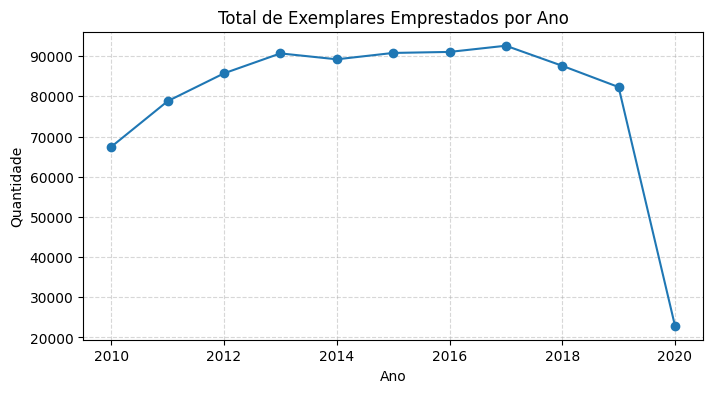

In [57]:
plt.figure(figsize=(8,4))
df_completo.groupby("ano")["codigo_barras"].nunique().plot(
    kind="line", marker="o", color="#1f77b4"
)
plt.title("Total de Exemplares Emprestados por Ano")
plt.xlabel("Ano")
plt.ylabel("Quantidade")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

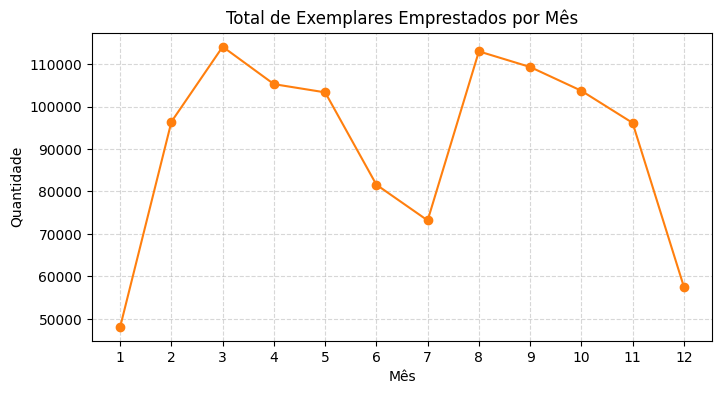

In [58]:
plt.figure(figsize=(8,4))
df_completo.groupby("mes")["codigo_barras"].nunique().plot(
    kind="line", marker="o", color="#ff7f0e"
)
plt.title("Total de Exemplares Emprestados por Mês")
plt.xlabel("Mês")
plt.ylabel("Quantidade")
plt.xticks(range(1,13))
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


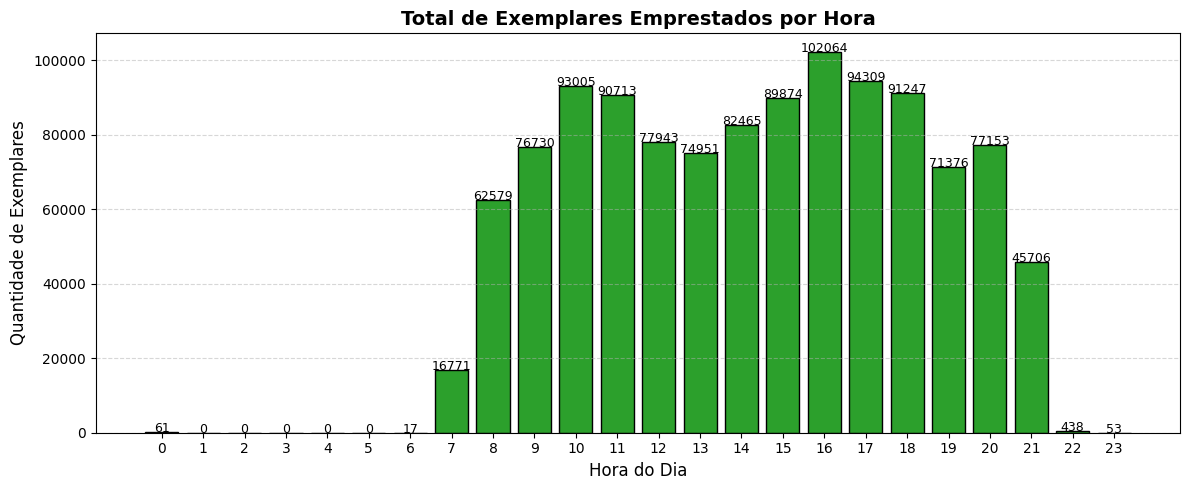

In [60]:

# Garantir que a coluna "hora" é int
df_completo["hora"] = df_completo["hora"].astype(int)

# Criar índice de 0 a 23 para representar todas as horas do dia
todas_horas = pd.Series(range(24), name="hora")

# Agrupar dados e alinhar com todas as horas
emprestimos_por_hora = df_completo.groupby("hora")["codigo_barras"].nunique()
emprestimos_por_hora = todas_horas.to_frame().merge(
    emprestimos_por_hora, on="hora", how="left"
).fillna(0)

# Plot
plt.figure(figsize=(12, 5))
plt.bar(
    emprestimos_por_hora["hora"], 
    emprestimos_por_hora["codigo_barras"], 
    color="#2ca02c", edgecolor="black"
)

# Títulos e rótulos
plt.title("Total de Exemplares Emprestados por Hora", fontsize=14, fontweight="bold")
plt.xlabel("Hora do Dia", fontsize=12)
plt.ylabel("Quantidade de Exemplares", fontsize=12)

# Rótulos em cima das barras
for i, valor in enumerate(emprestimos_por_hora["codigo_barras"]):
    plt.text(i, valor + 0.5, int(valor), ha='center', fontsize=9)

# Eixo X de 0 a 23
plt.xticks(range(24))

plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()
